In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
data[' Net Income Flag'].value_counts()  #모든 값 1 - 삭제

1    6819
Name:  Net Income Flag, dtype: int64

In [ ]:
data.drop(columns=' Net Income Flag', inplace=True)

In [ ]:
#over sampling - SMOTE

from imblearn.over_sampling import *

X = data.iloc[:,1:]
y = data.iloc[:,0]

X_res, y_res = SMOTE(random_state=50).fit_resample(X,y)

print('the shape of X_res: ', X_res.shape)
print('the shape of y_res: ', y_res.shape)

print('counts of label 1: ', sum(y_res==1))
print('counts of label 0: ', sum(y_res==0))

the shape of X_res:  (13198, 94)
the shape of y_res:  (13198,)
counts of label 1:  6599
counts of label 0:  6599


<AxesSubplot:>

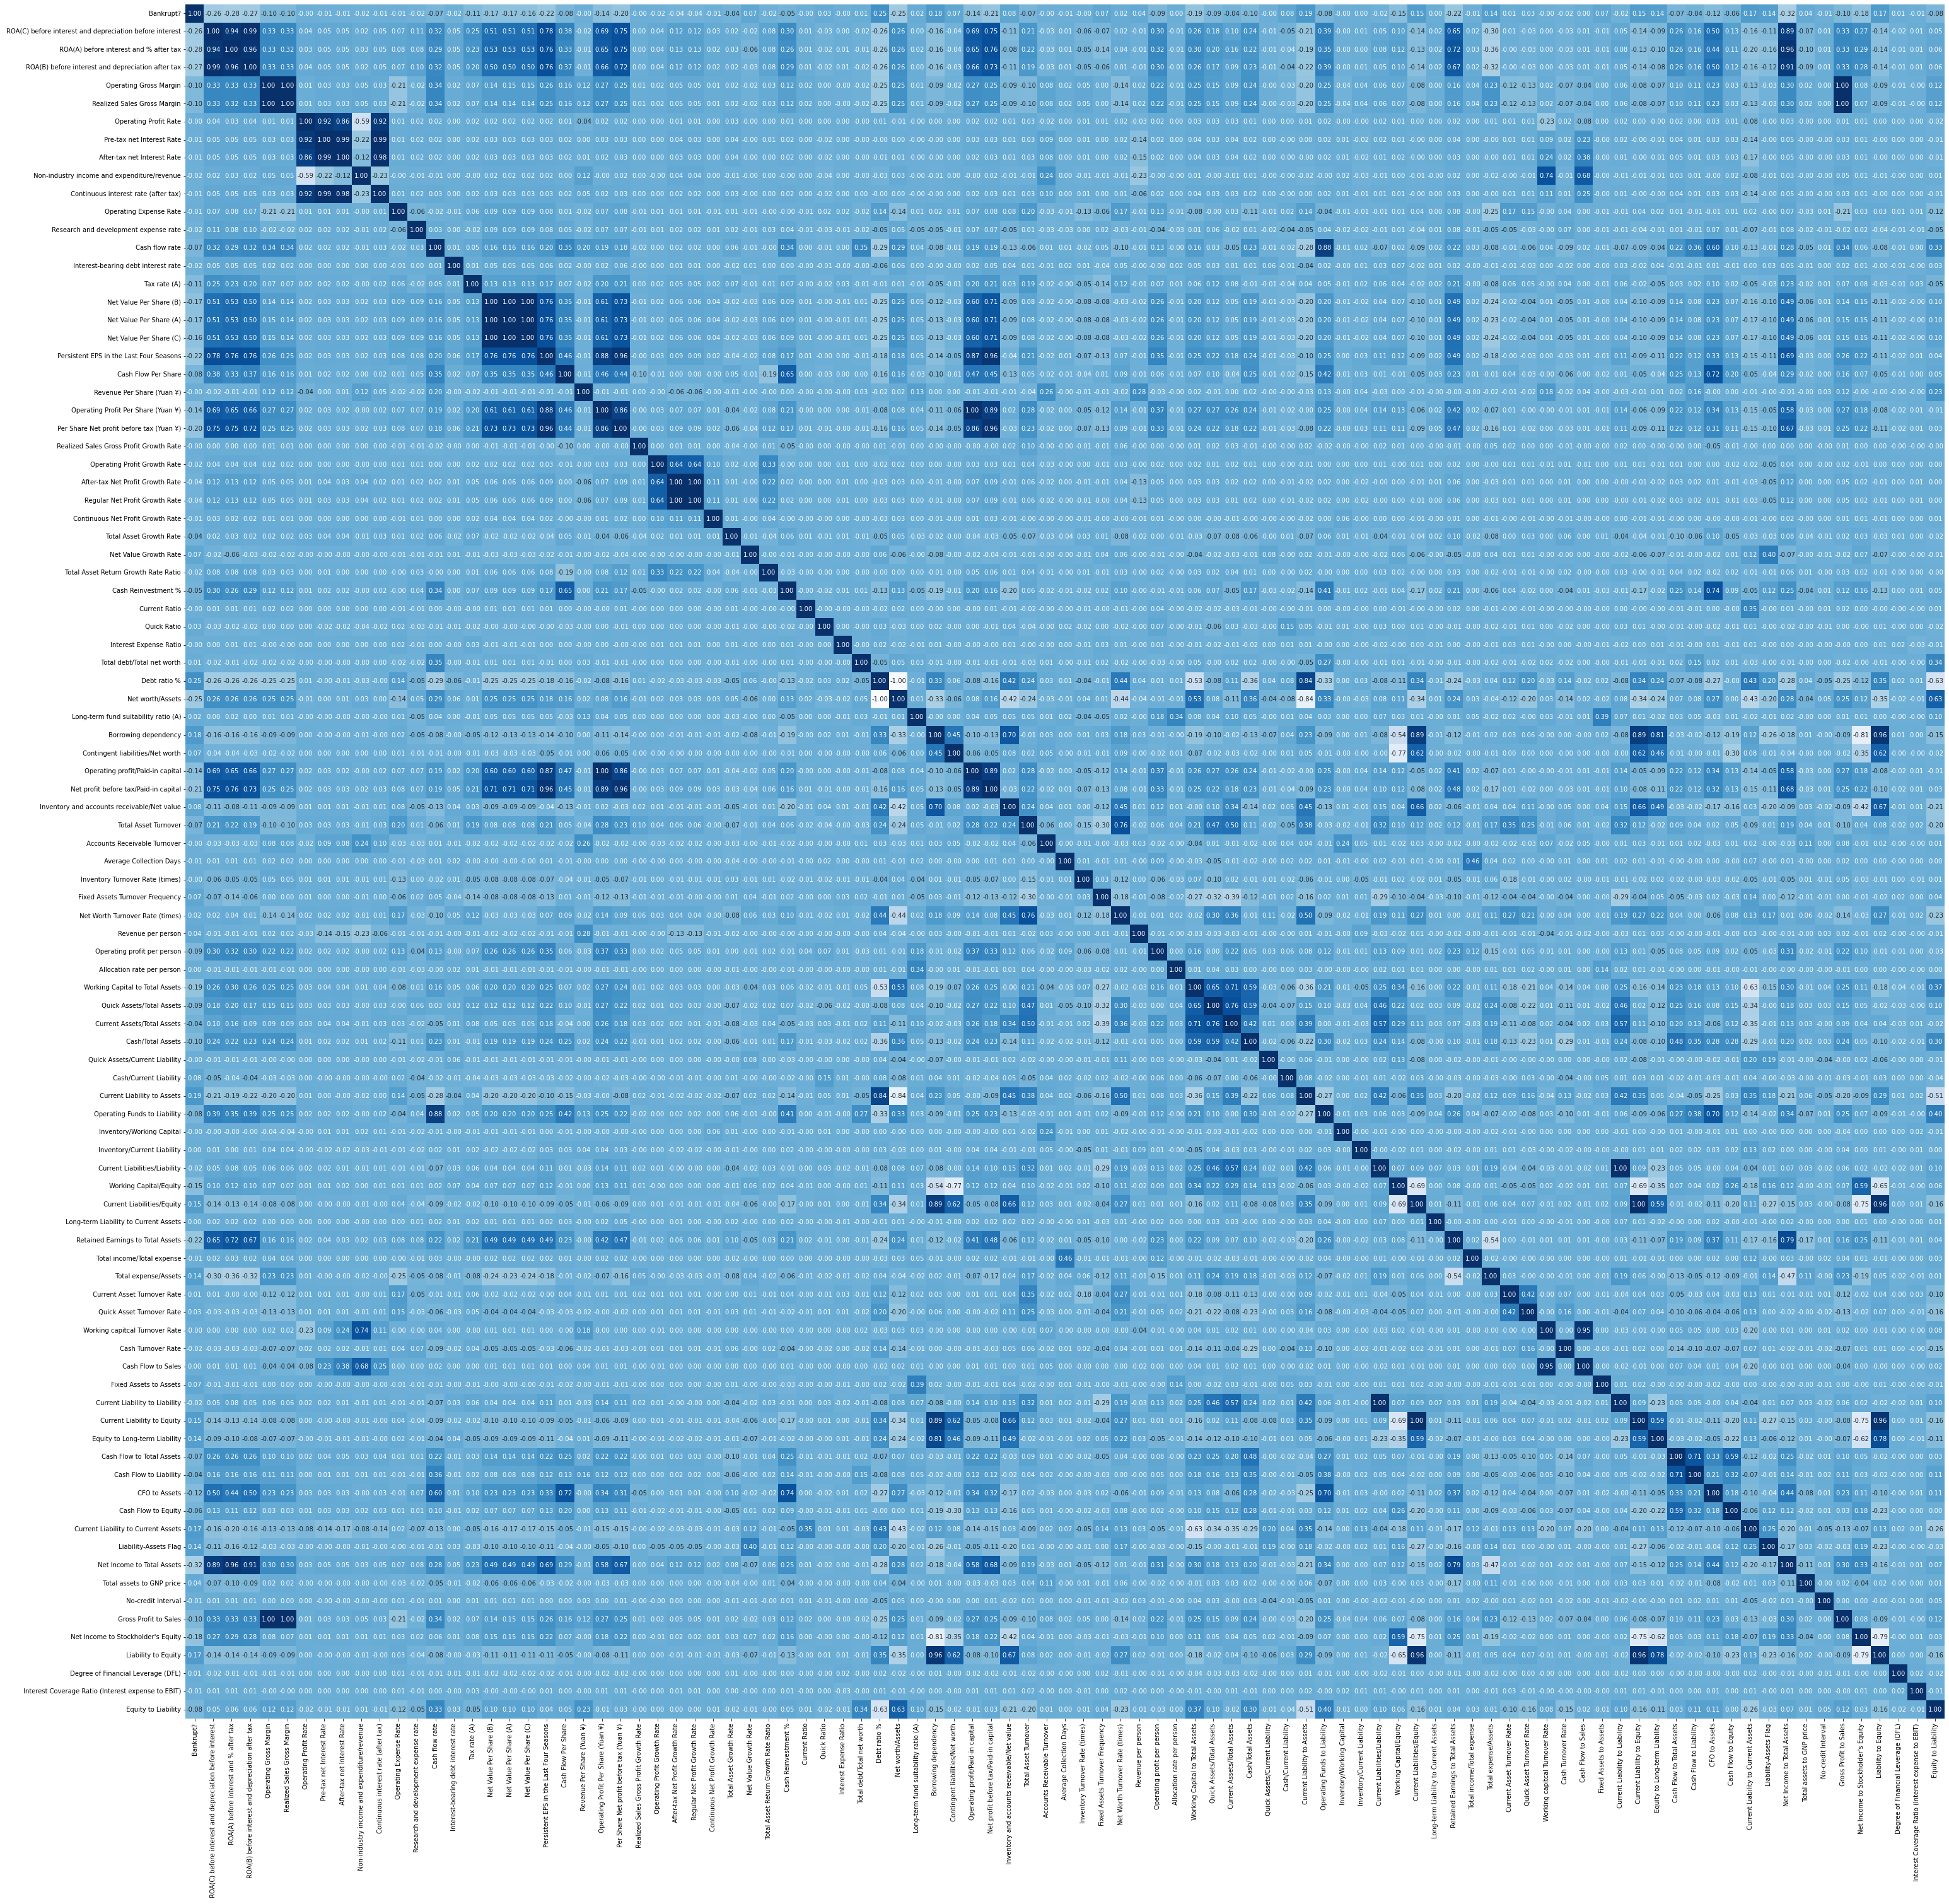

In [ ]:
plt.figure(figsize=(50,50))
data_corr = data.corr()
sns.heatmap(data_corr, cmap='Blues', annot=True, cbar=False, fmt='.2f')

In [ ]:
#1) VIF를 통해 변수 제거

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_res.values, i) for i in range(X_res.shape[1])]
vif['features'] = X_res.columns
vif

,VIF Factor,features
0,1.099923e+02,ROA(C) before interest and depreciation befor...
1,7.815863e+01,ROA(A) before interest and % after tax
2,1.971559e+02,ROA(B) before interest and depreciation after...
3,5.814811e+07,Operating Gross Margin
4,1.310656e+03,Realized Sales Gross Margin
...,...,...
89,2.831191e+01,Net Income to Stockholder's Equity
90,1.818879e+03,Liability to Equity
91,1.035802e+00,Degree of Financial Leverage (DFL)
92,1.022918e+00,Interest Coverage Ratio (Interest expense to ...


In [ ]:
vif[vif['VIF Factor'] < 10].shape
#vif 10미만인 feature 54개 

(54, 2)

In [ ]:
X_vif = X_res[vif[vif['VIF Factor'] < 10].features.values]
X_vif.shape

(13198, 54)

<AxesSubplot:>

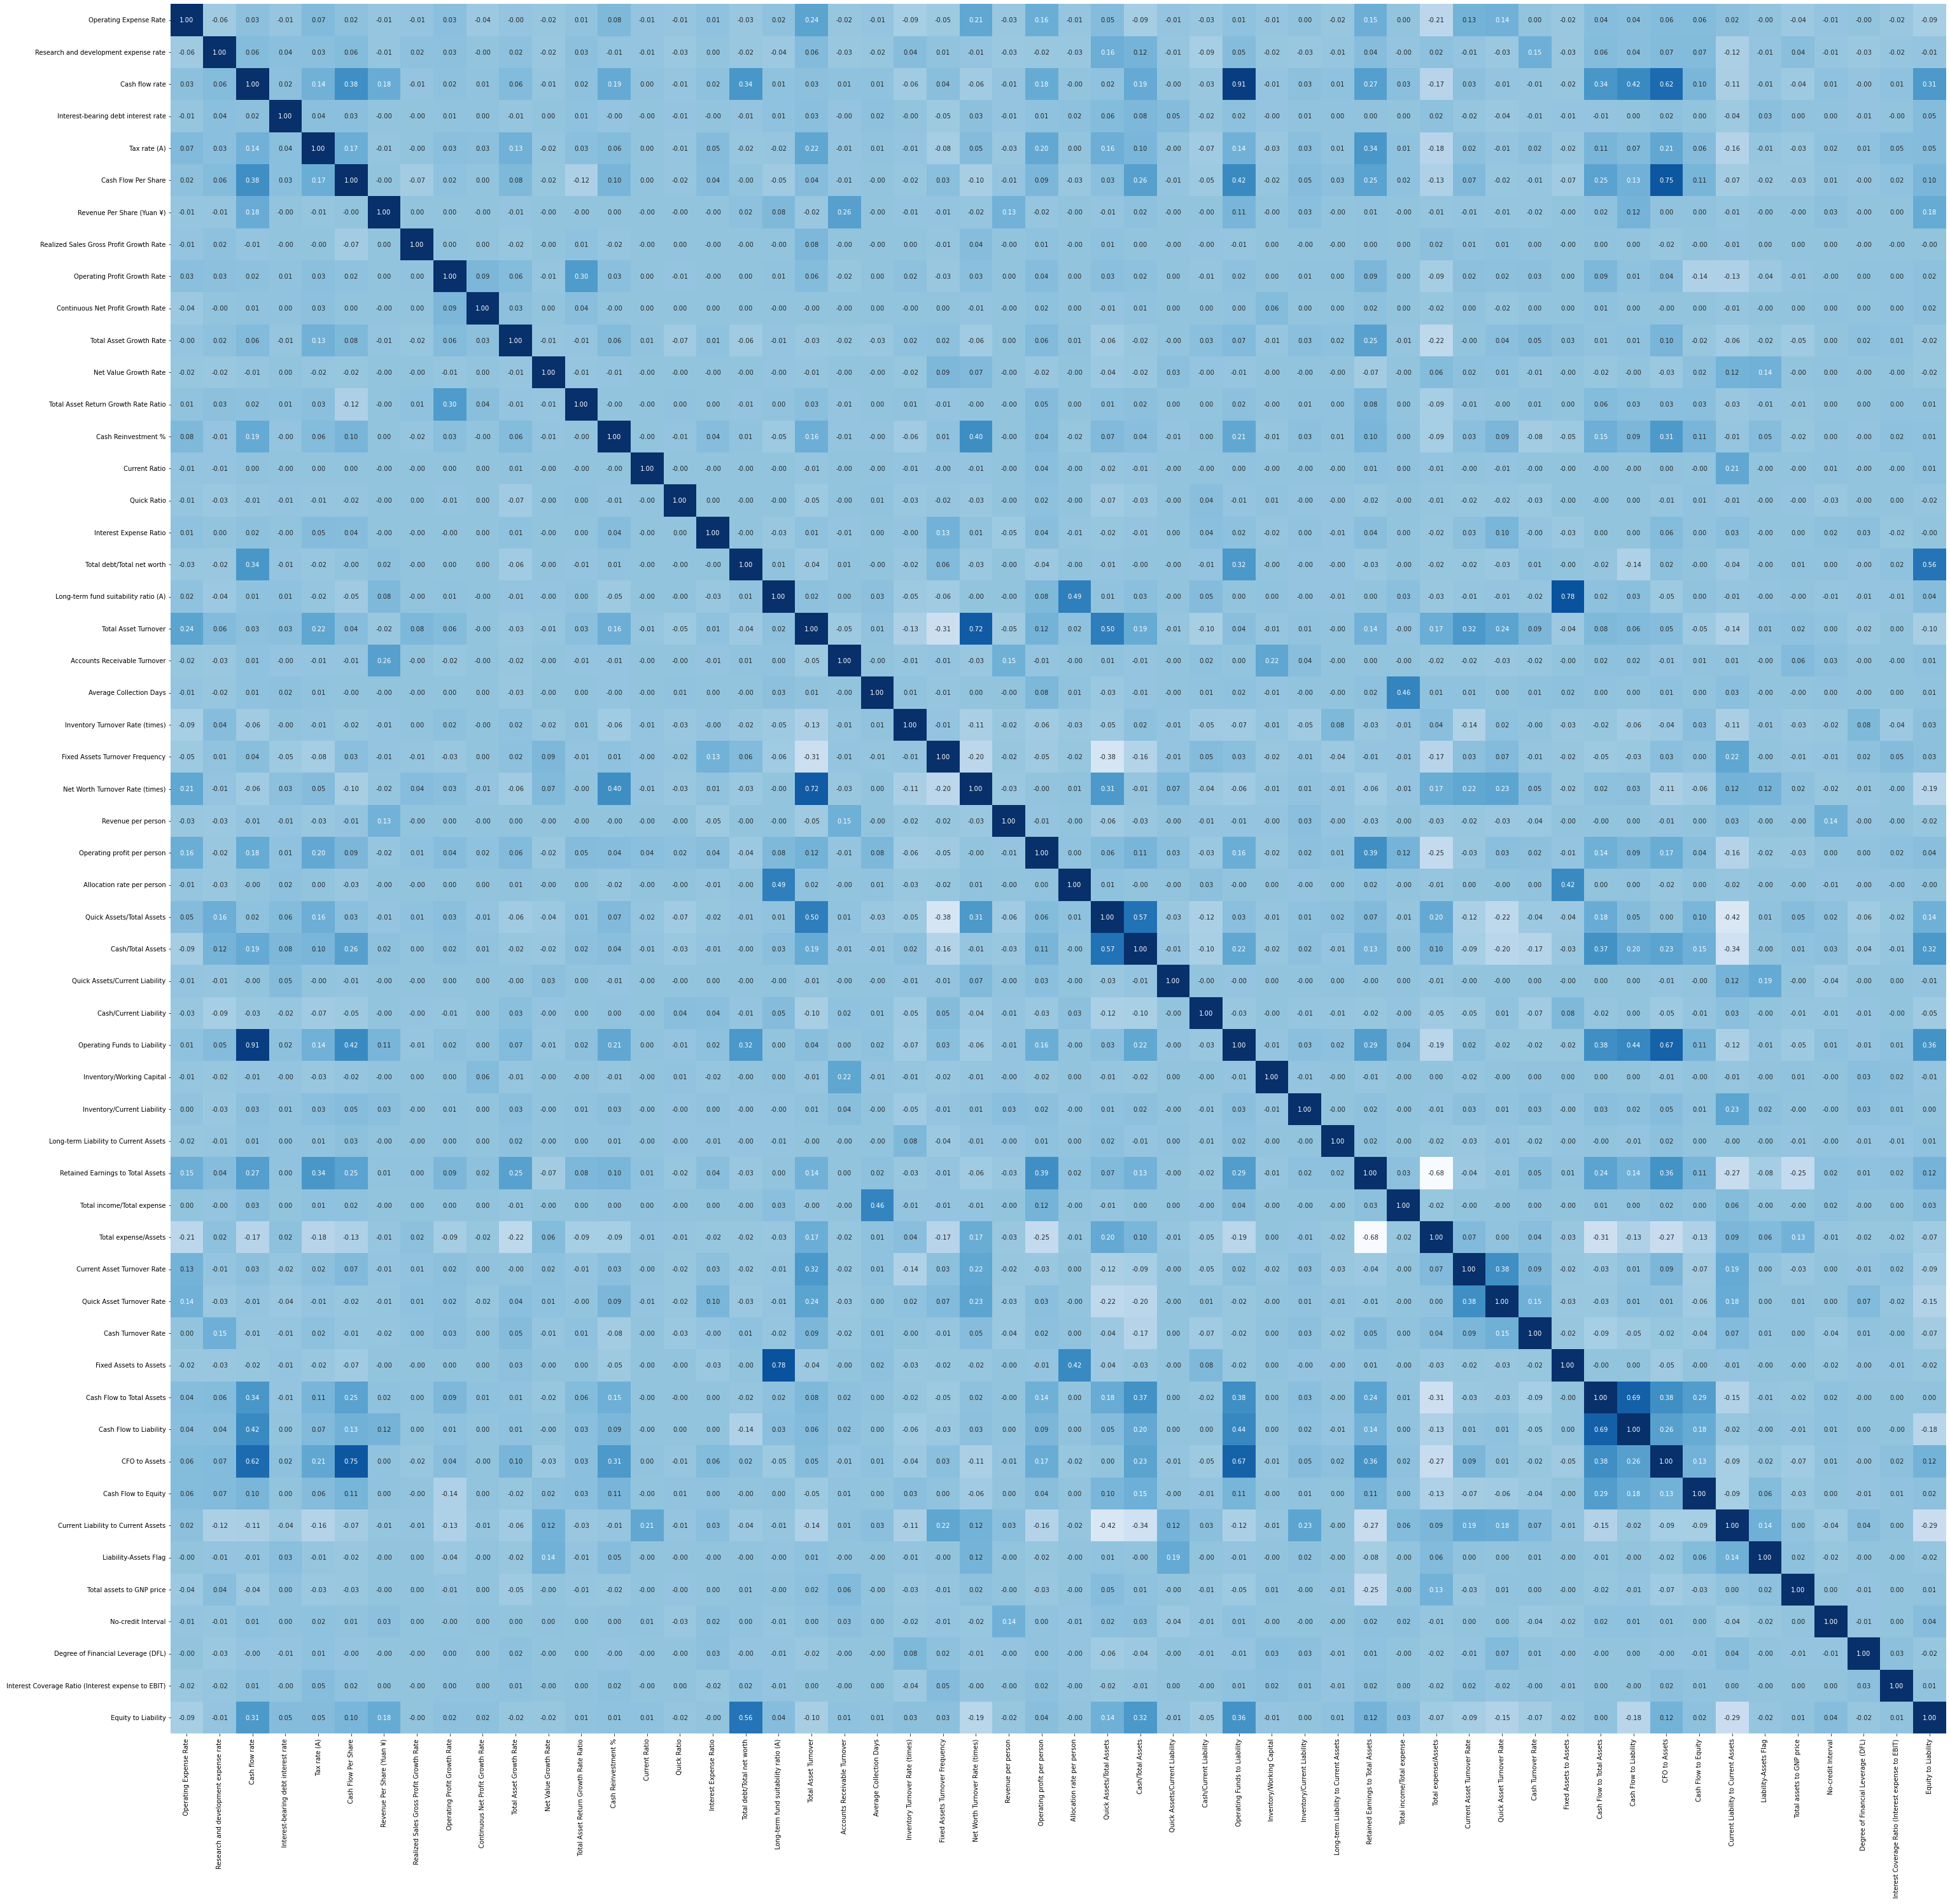

In [ ]:
plt.figure(figsize=(50,50))
X_vif_corr = X_vif.corr()
sns.heatmap(X_vif_corr, cmap='Blues', annot=True, cbar=False, fmt='.2f')

In [ ]:
#54개 다시 vif 분석
vif2 = pd.DataFrame()
vif2['VIF Factor'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif2['features'] = X_vif.columns
vif2.sort_values('VIF Factor', ascending=False).head(10)

,VIF Factor,features
32,7.620948,Operating Funds to Liability
2,5.824405,Cash flow rate
45,5.312998,CFO to Assets
19,4.205998,Total Asset Turnover
24,3.814975,Net Worth Turnover Rate (times)
18,3.052274,Long-term fund suitability ratio (A)
44,3.035785,Cash Flow to Liability
43,2.987151,Cash Flow to Total Assets
36,2.958789,Retained Earnings to Total Assets
38,2.870684,Total expense/Assets


In [ ]:
#아직 상관관계가 높은 변수들이 있음 - 0.7 이상인 변수 확인 

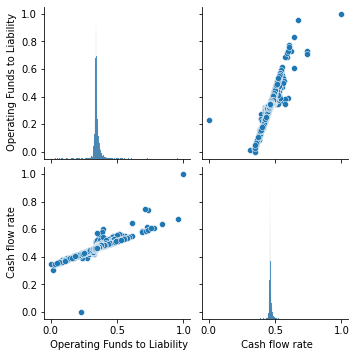

In [ ]:
#corr: 0.91  -> 선형성 띤다. vif 높은변수 제거 
sns.pairplot(X_vif[[' Operating Funds to Liability',' Cash flow rate']])

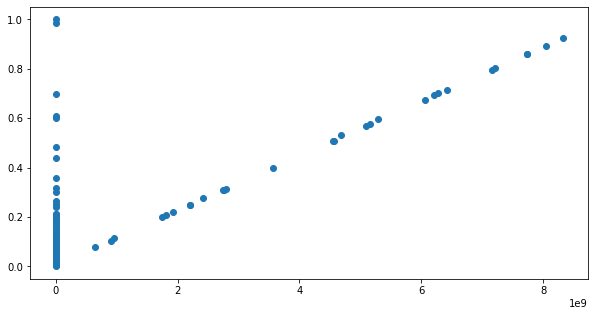

In [ ]:
#' Fixed Assets to Assets', ' Long-term fund suitability ratio (A)' corr: 0.78 - 둘 중 vif 높은 변수 제거

plt.figure(figsize=(10,5))
plt.scatter(X_vif[' Fixed Assets to Assets'],X_vif[' Long-term fund suitability ratio (A)'])

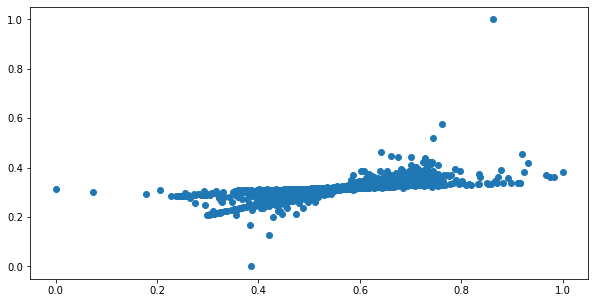

In [ ]:
#' CFO to Assets',' Cash Flow Per Share' corr: 0.75  - 둘 중 높은 ' CFO to Assets' drop

plt.figure(figsize=(10,5))
plt.scatter(X_vif[' CFO to Assets'],X_vif[' Cash Flow Per Share'])

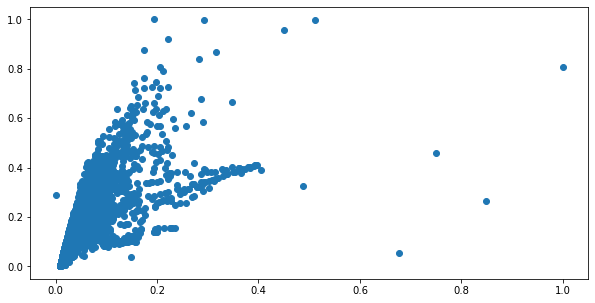

In [ ]:
#' Net Worth Turnover Rate (times)', ' Total Asset Turnover' corr: 0.72 - ' Total Asset Turnover' drop

plt.figure(figsize=(10,5))
plt.scatter(X_vif[' Net Worth Turnover Rate (times)'],X_vif[' Total Asset Turnover'])

In [ ]:
#상관관계 & vif 보면 상관관계 높은 변수 vif 값 3이상인 변수에 포함 - vif 3이상 제거

vif_3_up = vif2[vif2['VIF Factor'] >= 3]
vif_3_up

,VIF Factor,features
2,5.824405,Cash flow rate
18,3.052274,Long-term fund suitability ratio (A)
19,4.205998,Total Asset Turnover
24,3.814975,Net Worth Turnover Rate (times)
32,7.620948,Operating Funds to Liability
44,3.035785,Cash Flow to Liability
45,5.312998,CFO to Assets


In [ ]:
X_vif_drop = X_vif.drop(columns=vif_3_up.features.values)
X_vif_drop.shape

(13198, 47)

In [ ]:
#featrue scaling

scaler = StandardScaler()
X_sc = scaler.fit_transform(X_vif_drop)

In [ ]:
#PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_sc)
result = pd.DataFrame({'고윳값':pca.explained_variance_, '기여율':pca.explained_variance_ratio_})
result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
0,3.067794,0.065267,0.065267
1,2.368190,0.050383,0.115650
2,1.691196,0.035980,0.151631
3,1.572285,0.033450,0.185081
4,1.506790,0.032057,0.217138
5,1.490668,0.031714,0.248852
6,1.429555,0.030414,0.279266
7,1.388335,0.029537,0.308802
8,1.306514,0.027796,0.336598
9,1.262484,0.026859,0.363458


In [ ]:
#누적 기여율 85%이상인 차원수 33개로 설정

pca = PCA(n_components=33)
X_pca = pca.fit_transform(X_sc)

In [ ]:
#train & test 

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size = 0.3, random_state=1)

In [ ]:
from sklearn import neighbors  #KNN
from sklearn.svm import SVC    #SVC
from sklearn.linear_model import LogisticRegression  #LogisticRegression
from sklearn.tree import DecisionTreeClassifier  #DecisionTree
from sklearn.naive_bayes import GaussianNB   #가우시안
from sklearn.ensemble import RandomForestClassifier #RandomForest
from sklearn.ensemble import AdaBoostClassifier   #Adaboost
from sklearn.ensemble import GradientBoostingClassifier   #GradientBoost
from xgboost import XGBClassifier   #XGBoost
from lightgbm import LGBMClassifier  #Light GBM
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

knn = neighbors.KNeighborsClassifier()
lr = LogisticRegression()
tree = DecisionTreeClassifier()
GNB = GaussianNB()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

for model in [knn, lr, tree, GNB, rf, ada, gb, xgb, lgbm]:
    model.fit(X_train, y_train)
    pred_model = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred_model)
    
    print('{0}: {1: .4f}'.format(model, accuracy))

KNeighborsClassifier():  0.9348
LogisticRegression():  0.8697
DecisionTreeClassifier():  0.9210
GaussianNB():  0.5207
RandomForestClassifier():  0.9692
AdaBoostClassifier():  0.8659
GradientBoostingClassifier():  0.9104
[01:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='aut

In [ ]:
#96.92% RandomForest, 97.15% XGBoost, 96.09% LGBM으로 하이퍼파라미터 조정

In [ ]:
#1) Randomforest

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[200],
         'min_samples_leaf':[1,2,4],
         'min_samples_split':[2,4,6]}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid=params, cv=2)
grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9577830699285559


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_rf = grid_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rf)
precision = precision_score(y_test, pred_rf)
recall = recall_score(y_test, pred_rf)
f1 = f1_score(y_test, pred_rf)
                          
print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, f1 score: {3: .4f} '.format(accuracy, precision, recall, f1))

정확도:  0.9692, 정밀도:  0.9505, 재현율:  0.9893, f1 score:  0.9695 


In [ ]:
#2) XGBoost

params = {'n_estimators':[500],
         'learning_rate':[0.1, 0.3, 0.5],
         'max_depth':[3,4,6]}

xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, param_grid=params, cv=2)
grid_xgb.fit(X_train, y_train)

print(grid_xgb.best_params_)
print(grid_xgb.best_score_)

[02:17:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
pred_xgb = grid_xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred_xgb)
precision = precision_score(y_test, pred_xgb)
recall = recall_score(y_test, pred_xgb)
f1 = f1_score(y_test, pred_xgb)
                          
print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, f1 score: {3: .4f} '.format(accuracy, precision, recall, f1))

정확도:  0.9710, 정밀도:  0.9507, 재현율:  0.9929, f1 score:  0.9713 


In [ ]:
b

LGBMClassifier(learning_rate=0.3, max_depth=4, n_estimators=500)

In [ ]:
pred_lgbm = grid_lgbm.predict(X_test)
accuracy = accuracy_score(y_test, pred_lgbm)
precision = precision_score(y_test, pred_lgbm)
recall = recall_score(y_test, pred_lgbm)
f1 = f1_score(y_test, pred_lgbm)
      
print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, f1 score: {3: .4f} '.format(accuracy, precision, recall, f1))

정확도:  0.9740, 정밀도:  0.9563, 재현율:  0.9929, f1 score:  0.9742 


In [ ]:
#누적 기여율 90%이상인 차원수 35개로 설정

pca = PCA(n_components=35)
X_pca = pca.fit_transform(X_sc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size = 0.3, random_state=1)

In [ ]:
from sklearn import neighbors  #KNN
from sklearn.svm import SVC    #SVC
from sklearn.linear_model import LogisticRegression  #LogisticRegression
from sklearn.tree import DecisionTreeClassifier  #DecisionTree
from sklearn.naive_bayes import GaussianNB   #가우시안
from sklearn.ensemble import RandomForestClassifier #RandomForest
from sklearn.ensemble import AdaBoostClassifier   #Adaboost
from sklearn.ensemble import GradientBoostingClassifier   #GradientBoost
from xgboost import XGBClassifier   #XGBoost
from lightgbm import LGBMClassifier  #Light GBM
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

knn = neighbors.KNeighborsClassifier()
lr = LogisticRegression()
tree = DecisionTreeClassifier()
GNB = GaussianNB()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

for model in [knn, lr, tree, GNB, rf, ada, gb, xgb, lgbm]:
    model.fit(X_train, y_train)
    pred_model = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred_model)
    
    print('{0}: {1: .4f}'.format(model, accuracy))

KNeighborsClassifier():  0.9306
LogisticRegression():  0.8535
DecisionTreeClassifier():  0.9212
GaussianNB():  0.5104
RandomForestClassifier():  0.9720
AdaBoostClassifier():  0.8548
GradientBoostingClassifier():  0.9119
[01:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='aut